In [1]:
# import libraries
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load data 
business_df = pd.read_csv('Data/yelp_business_cleaned.csv')
# Get rid of state rows that only have 1 record (XMS and HI) only
business_df = business_df = business_df.loc[(business_df["state"] != 'XMS') & (business_df["state"] != 'HI')]

In [3]:
# Drop columns not needed for machine learning models and get rid of state rows that only have 1 record (XMS and HI) only
business_df_ml = business_df.drop(['business_id','name','address','postal_code','latitude','longitude','categories','Null Count'], axis=1)

In [4]:
business_df_no_city_state = business_df_ml.drop(['state','city'], axis=1)
business_df_no_city_state

,stars,review_count,open_weekends,open_monday,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,...,GoodForKids,RestaurantsReservations,DogsAllowed,RestaurantsTableService,RestaurantsGoodForGroups,HasTV,HappyHour,DriveThru,NoiseLevel,Smoking
0,4.0,80,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,4.5,13,1,0,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,2.0,6,1,0,1,1,1,0,1,1,...,1,0,0,0,1,1,0,1,0,0
3,1.5,10,1,0,1,1,1,0,1,1,...,1,0,0,0,0,1,0,1,0,0
4,4.0,10,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44577,3.0,11,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
44578,4.0,33,1,0,0,1,1,1,1,0,...,1,0,0,0,1,0,0,0,3,0
44579,4.5,41,1,0,0,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
44580,4.5,35,1,1,1,0,1,1,2,1,...,1,0,0,1,1,1,0,0,0,0


In [ ]:
business_df_no_city_state.shape

(44582, 24)

In [ ]:
#Convert state and city columns using dummy variables method
 
business_df_ml = pd.get_dummies(data=business_df_ml,columns=['state','city'],drop_first=True)
business_df_ml.head()

,stars,review_count,open_weekends,open_monday,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,...,city_Zionsville,city_boise,city_clearwater,city_erdenheim,city_goodlettsville,city_lawrence,city_philadelphia,city_sewell,city_wilmington,city_wimauma
0,4.0,80,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,4.5,13,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,6,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1.5,10,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4.0,10,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
business_df_ml.shape

(44580, 936)

In [ ]:
# Filter out city dummy variable columns with less than 50 positive values to make sure training ands test sets get enough data
cities_under_50_samples = business_df['city'].value_counts()[business_df['city'].value_counts() < 50].index
column_names_cities_under_50_samples = ['city_' + i for i in cities_under_50_samples]

business_df_ml_filtered = business_df_ml.drop(column_names_cities_under_50_samples, axis=1)
business_df_ml_filtered.shape


(44580, 181)

In [5]:
# Separate input variables that do not include the city or state
X_no_city_state = business_df_no_city_state.loc[:,business_df_no_city_state.columns != 'stars']
y_no_city_state = business_df_no_city_state['stars']

In [ ]:
# Separate input and target variables based on filtered cities with greater than 50 records to make sure train and test data can get distributed properly
X_filtered = business_df_ml_filtered.loc[:,business_df_ml_filtered.columns != 'stars']
y_filtered = business_df_ml_filtered['stars']

In [ ]:
y_filtered

0        4.0
1        4.5
2        2.0
3        1.5
4        4.0
        ... 
44577    3.0
44578    4.0
44579    4.5
44580    4.5
44581    4.5
Name: stars, Length: 44580, dtype: float64

# Linear Regression Models

## Running XG Boost model on Filtered City and State dummy variables

In [ ]:
# No city or state in x data for  cross validation

# Linear regression 5 cross validation shown in a different manner

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate
import numpy as np

# Create a Linear Regression model
model = LinearRegression()

# Create a KFold object with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Load your dataset and split into X and y variables

# Train the model using cross-validation
cv_results = cross_validate(model, X_no_city_state, y_no_city_state, cv=kfold, scoring='r2', return_train_score=True)

# Print the accuracy scores for each fold
print("Test accuracy scores:", cv_results['test_score'])

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy score:", np.mean(cv_results['test_score']))
print("Standard deviation of accuracy score:", np.std(cv_results['test_score']))


Test R2 scores: [0.24845806 0.25049537 0.27123721 0.2662209  0.25876691]
Test accuracy scores: [0.24845806 0.25049537 0.27123721 0.2662209  0.25876691]
Mean accuracy score: 0.2590356895159148
Standard deviation of accuracy score: 0.00877952027103302


## Running Linear Regression model on No city or state in x data for  cross validation

In [ ]:
# Filtered City and State dummy variables

# Linear regression 5 cross validation shown in a different manner

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate
import numpy as np

# Create a Linear Regression model
model = LinearRegression()

# Create a KFold object with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Load your dataset and split into X and y variables

# Train the model using cross-validation
cv_results = cross_validate(model, X_filtered, y_filtered, cv=kfold, scoring='r2', return_train_score=True)

# Print the accuracy scores for each fold
print("Test accuracy scores:", cv_results['test_score'])

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy score:", np.mean(cv_results['test_score']))
print("Standard deviation of accuracy score:", np.std(cv_results['test_score']))


Test R2 scores: [0.25146389 0.25435646 0.27050514 0.26515793 0.2621692 ]
Test accuracy scores: [0.25146389 0.25435646 0.27050514 0.26515793 0.2621692 ]
Mean accuracy score: 0.26073052333674535
Standard deviation of accuracy score: 0.006981604746769852


# XG Boost Models

## Running XG Boost model on Filtered City and State dummy variables for cross validation

In [ ]:
# Importing libraries needed
!pip install xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# Train the model using cross-validation
cv_results = cross_validate(model, X_filtered, y_filtered, cv=kfold, scoring='r2', return_train_score=True)

# Print the accuracy scores for each fold
print("Test accuracy scores:", cv_results['test_score'])

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy score:", np.mean(cv_results['test_score']))
print("Standard deviation of accuracy score:", np.std(cv_results['test_score']))


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Test R2 scores: [0.34967975 0.35700878 0.36758343 0.36059856 0.37040397]
Test accuracy scores: [0.34967975 0.35700878 0.36758343 0.36059856 0.37040397]
Mean accuracy score: 0.36105489805624263
Standard deviation of accuracy score: 0.007429674035293123


## Running XG Boost model on No city or state in x data for  cross validation

In [ ]:
# Importing libraries needed
!pip install xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# Train the model using cross-validation
cv_results = cross_validate(model, X_no_city_state, y_no_city_state, cv=kfold, scoring='r2', return_train_score=True) 

# Print the accuracy scores for each fold
print("Test accuracy scores:", cv_results['test_score'])

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy score:", np.mean(cv_results['test_score']))
print("Standard deviation of accuracy score:", np.std(cv_results['test_score']))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 10.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Test accuracy scores: [0.34847833 0.3602657  0.37596511 0.36970435 0.36726786]
Mean accuracy score: 0.36433626956977516
Standard deviation of accuracy score: 0.00938812446679757


# Neural Network Models

## Neural Network model with no city and no state data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Create the neural network regression model
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)

# Perform 5-fold cross-validation and get the R2 scores
scores = cross_val_score(model, X_no_city_state, y_no_city_state, cv=5, scoring='r2')

# Print the R2 scores for each fold
print('Test accuracy scores:', scores)

# Calculate and print the mean R2 score
mean_score = np.mean(scores)
print('Mean accuracy score:', mean_score)

std_score = np.std(scores)
print('Standard deviation of accuracy score:', std_score)

R2 scores for each fold: [0.12968612 0.28401895 0.27839204 0.32422386 0.28470933]
Mean R2 score: 0.26020605938301106


## Neural Network model with Filtered City and State dummy variables

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Create the neural network regression model
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)

# Perform 5-fold cross-validation and get the R2 scores
scores = cross_val_score(model, X_filtered, y_filtered, cv=5, scoring='r2')

# Print the R2 scores for each fold
print('Test accuracy scores:', scores)

# Calculate and print the mean R2 score
mean_score = np.mean(scores)
print('Mean accuracy score:', mean_score)

std_score = np.std(scores)
print('Standard deviation of accuracy score:', std_score)

Test R2 scores: [0.26272562 0.31085084 0.29186524 0.32915687 0.32197798]
Mean accuracy score: 0.3033153116167749
Standard deviation of accuracy score: 0.023880924705432825


# Improving XG Boost Models

## Enhancing no city and no state data 

Training model with learning rate = 0.1...
Training RMSE: 0.6885, Validation RMSE: 0.7103
Training model with learning rate = 0.05...
Training RMSE: 0.7018, Validation RMSE: 0.7167
Training model with learning rate = 0.01...
Training RMSE: 1.3543, Validation RMSE: 1.3549
Training model with learning rate = 0.005...
Training RMSE: 2.0162, Validation RMSE: 2.0161
Training model with learning rate = 0.001...
Training RMSE: 2.8915, Validation RMSE: 2.8925


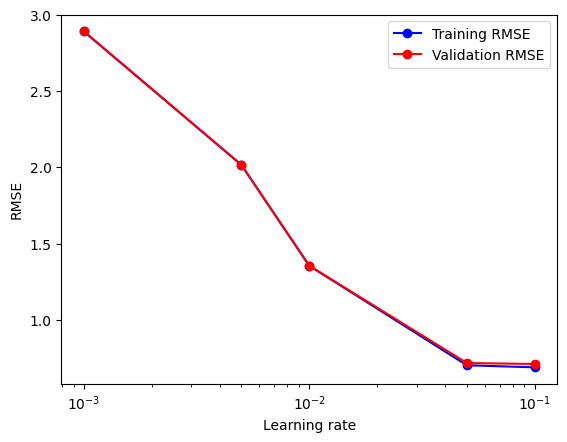

Best learning rate: 0.1000


In [11]:
# Enhance learning rate for xgboost model
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Load your data and split it into training and validation sets
# Determine the percentage of data to be used for validation
validation_size = 0.2

# Use the train_test_split function to split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_no_city_state, y_no_city_state, test_size=validation_size, random_state=42)

# Define a range of learning rates to try
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]

# Define the other hyperparameters of the model
params = {
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Initialize lists to store the performance and learning rate values
train_scores = []
val_scores = []

# Train the model for each learning rate
for rate in learning_rates:
    print(f'Training model with learning rate = {rate}...')
    # Update the learning rate parameter
    params['learning_rate'] = rate
    # Create the XGBoost regressor model
    model = xgb.XGBRegressor(**params)
    # Train the model
    model.fit(X_train, y_train)
    # Get the predictions on the training and validation sets
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    # Compute the mean squared error for the training and validation sets
    train_score = np.sqrt(np.mean((train_preds - y_train)**2))
    val_score = np.sqrt(np.mean((val_preds - y_val)**2))
    # Add the scores to the lists
    train_scores.append(train_score)
    val_scores.append(val_score)
    print(f'Training RMSE: {train_score:.4f}, Validation RMSE: {val_score:.4f}')

# Plot the performance vs. learning rate
plt.plot(learning_rates, train_scores, 'bo-', label='Training RMSE')
plt.plot(learning_rates, val_scores, 'ro-', label='Validation RMSE')
plt.xscale('log')
plt.xlabel('Learning rate')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Choose the learning rate with the best performance on the validation set
best_learning_rate = learning_rates[np.argmin(val_scores)]
print(f'Best learning rate: {best_learning_rate:.4f}')


In [22]:
# Find optimal max_depth and optimal min_child_weight for xgboost model
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the XGBoost regression model
model = xgb.XGBRegressor(learning_rate=0.10)

# Define the grid of hyperparameters to search over
param_grid = {
    'max_depth': [5, 6, 7],
    'min_child_weight': [4, 5, 6]
}

# Perform a grid search with cross-validation to find the optimal hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_no_city_state, y_no_city_state)

# Print the optimal hyperparameters and the corresponding mean squared error
print('Optimal max_depth:', grid_search.best_params_['max_depth'])
print('Optimal min_child_weight:', grid_search.best_params_['min_child_weight'])
print('Best neg_mean_squared_error:', grid_search.best_score_)


Optimal max_depth: 7
Optimal min_child_weight: 6
Best neg_mean_squared_error: -0.49205567047950066


In [6]:
# Tuning gamma parameter of the xgboost model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameters to tune
param_grid = {
    'gamma': [0, 0.1, 0.5, 1, 10]
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_no_city_state, y_no_city_state)

# Print the best hyperparameters
print("Best gamma: ", grid_search.best_params_['gamma'])


Best gamma:  1


In [9]:
# Tune subsample and colsample_bytree 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
# Define the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameters to tune
param_grid = {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_no_city_state, y_no_city_state)

# Print the best hyperparameters
print("Best subsample: ", grid_search.best_params_['subsample'])
print("Best colsample_bytree: ", grid_search.best_params_['colsample_bytree'])


Best subsample:  1.0
Best colsample_bytree:  0.6


## Enhanced model

In [10]:
# Importing libraries needed
!pip install xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define XGBoost model
model = xgb.XGBRegressor(learning_rate=0.10, max_depth=7,min_child_weight=6,gamma=1,subsample=1.0,colsample_bytree=0.6)

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# Train the model using cross-validation
cv_results = cross_validate(model, X_no_city_state, y_no_city_state, cv=kfold, scoring='r2', return_train_score=True) 

# Print the accuracy scores for each fold
print("Test accuracy scores:", cv_results['test_score'])

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy score:", np.mean(cv_results['test_score']))
print("Standard deviation of accuracy score:", np.std(cv_results['test_score']))

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Test accuracy scores: [0.36131801 0.37380994 0.39215954 0.38230551 0.38161762]
Mean accuracy score: 0.3782421214686793
Standard deviation of accuracy score: 0.010272969185025705


Best Code Source for dummy variables: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

pd.dummy()

Overview of dummy variable concept: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

Split out the columns of attributes and categories into dummy variables

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fcd92ccc-2af6-49a1-bc78-ae9f0a350628' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>